In [2]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot  as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  cross_val_score

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Ensemble/churn.csv")

In [6]:
data.head(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [7]:
data.tail(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
4995,No,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,Yes,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,No,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,No,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0
4999,No,86,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0


In [8]:
data.shape

(5000, 18)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   int64  
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   int64  
 3   voicemailplan               5000 non-null   int64  
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [33]:
columnsTOEncode=list(data.select_dtypes(include=['category','object']))
le=LabelEncoder()
for feature in columnsTOEncode:
    try:
        data[feature]=le.fit_transform(data[feature])
    except:
        print("Error Encoding" + feature)
data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [34]:
x=data.iloc[:,1:]

In [35]:
x

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [36]:
y=2*data.iloc[:,0]-1

In [37]:
x=x.values
y=y.values

In [38]:
clf=tree.DecisionTreeClassifier(random_state=0)
clf.fit(x,y)
score=cross_val_score(clf,x,y)
score.mean()

0.9208000000000001

[Text(277.43210131731155, 213.0912, 'X[4] <= 264.65\ngini = 0.243\nsamples = 5000\nvalue = [4293, 707]'),
 Text(238.06149877196216, 204.3936, 'X[16] <= 3.5\ngini = 0.197\nsamples = 4686\nvalue = [4166, 520]'),
 Text(211.76750398169258, 195.696, 'X[1] <= 0.5\ngini = 0.144\nsamples = 4312\nvalue = [3976, 336]'),
 Text(179.83509380029506, 186.9984, 'X[6] <= 37.715\ngini = 0.093\nsamples = 3917\nvalue = [3726, 191]'),
 Text(147.79782708556866, 178.3008, 'X[9] <= 27.705\ngini = 0.051\nsamples = 3288\nvalue = [3202, 86]'),
 Text(128.05196318401286, 169.60320000000002, 'X[12] <= 10.735\ngini = 0.048\nsamples = 3263\nvalue = [3182, 81]'),
 Text(103.63880834227467, 160.9056, 'X[0] <= 224.5\ngini = 0.04\nsamples = 2527\nvalue = [2475, 52]'),
 Text(93.76173685622317, 152.208, 'X[3] <= 43.5\ngini = 0.04\nsamples = 2523\nvalue = [2472, 51]'),
 Text(77.45617757510729, 143.5104, 'X[5] <= 119.5\ngini = 0.038\nsamples = 2505\nvalue = [2456, 49]'),
 Text(53.39467274678111, 134.81279999999998, 'X[14] <= 

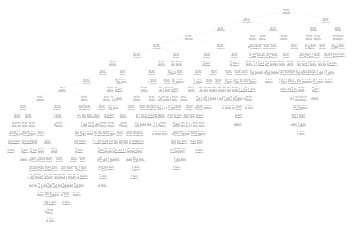

In [39]:
tree.plot_tree(clf)

In [40]:
#AdaBosting Techniques
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import DecisionTreeClassifier
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0))
clf.fit(x,y)
scores = cross_val_score(clf, x, y)
scores.mean()

0.9198000000000001

In [41]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
scores = cross_val_score(clf, x, y)
scores.mean()

0.9166000000000001